# The data used for this project's exploratory data analysis has been sourced from:

1) National Highway Traffic Safety Administration API (US data) (https://crashviewer.nhtsa.dot.gov/CrashAPI). 

## Data cleansing of the National Highway Traffic Safety Administration API (US data):

In [10]:
# importing dependencies
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt
import requests
import json
import csv 

In [15]:
# Import CSV containing road accident data from the year 2020. 
csv_path = "source_data/Accidents_2020_2020.csv"
Accidents_2020 = pd.read_csv(csv_path)
Accidents_2020

,caseyear,state,st_case,statename,ve_total,ve_forms,pvh_invl,peds,pernotmvit,permvit,...,hosp_mn,hosp_mnname,cf1,cf1name,cf2,cf2name,cf3,cf3name,fatals,drunk_dr
0,2020,1,10001,Alabama,1,1,0,0,0,4,...,99,Unknown EMS Hospital Arrival Time,NaN,NaN,NaN,NaN,NaN,NaN,3,1
1,2020,1,10002,Alabama,4,4,0,0,0,6,...,99,Unknown EMS Hospital Arrival Time,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,2020,1,10003,Alabama,2,2,0,0,0,2,...,99,Unknown EMS Hospital Arrival Time,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,2020,1,10004,Alabama,1,1,0,0,0,5,...,99,Unknown EMS Hospital Arrival Time,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,2020,1,10005,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36159,2020,56,560111,Wyoming,2,2,0,0,0,2,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0
36160,2020,56,560112,Wyoming,3,3,0,0,0,8,...,50,50,NaN,NaN,NaN,NaN,NaN,NaN,2,0
36161,2020,56,560113,Wyoming,3,3,0,0,0,9,...,99,Unknown EMS Hospital Arrival Time,NaN,NaN,NaN,NaN,NaN,NaN,1,0
36162,2020,56,560114,Wyoming,2,2,0,1,1,3,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [16]:
# The output DataFrame has lots of redundant columns, the below create a new DataFrames with the columns of focus in this exploration stage. 
Cleaned_df = Accidents_2020[["caseyear", "st_case","statename","persons", "countyname", "monthname", 
                                  "day_week", "hour", "rur_urbname", "routename", "latitude", "longitud", 
                                  "harm_evname","lgt_condname", "weathername", "fatals", "drunk_dr"]]
Cleaned_df

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,latitude,longitud,harm_evname,lgt_condname,weathername,fatals,drunk_dr
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,32.433133,-86.094850,Tree (Standing Only),Dark - Not Lighted,Clear,3,1
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,33.484658,-86.839544,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,33.299942,-86.369642,Ditch,Daylight,Rain,1,0
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,33.795072,-85.883486,Tree (Standing Only),Daylight,Cloudy,1,0
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,32.848414,-86.083547,Tree (Standing Only),Dark - Not Lighted,Rain,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36159,2020,560111,Wyoming,2,LARAMIE (21),December,7,16,Rural,County Road,41.211981,-105.123781,Motor Vehicle In-Transport,Dark - Not Lighted,Snow,1,0
36160,2020,560112,Wyoming,8,LINCOLN (23),December,6,18,Rural,U.S. Highway,42.814131,-110.957272,Motor Vehicle In-Transport,Dark - Not Lighted,Clear,2,0
36161,2020,560113,Wyoming,9,FREMONT (13),December,6,17,Rural,State Highway,42.993033,-108.406514,Motor Vehicle In-Transport,Dark - Not Lighted,Snow,1,0
36162,2020,560114,Wyoming,3,LARAMIE (21),December,3,20,Urban,U.S. Highway,41.138478,-104.787133,Motor Vehicle In-Transport,Dark - Not Lighted,Clear,1,0


In [17]:
# Checking the data types of the columns in the Cleaned_df. 
Cleaned_df.dtypes

caseyear          int64
st_case           int64
statename        object
persons           int64
countyname       object
monthname        object
day_week          int64
hour              int64
rur_urbname      object
routename        object
latitude        float64
longitud        float64
harm_evname      object
lgt_condname     object
weathername      object
fatals            int64
drunk_dr          int64
dtype: object

In [18]:
# Renaming the columns in Cleaned_df to be self-explanatory.
Cleaned_df = Cleaned_df.rename(columns={"caseyear":"Year", "st_case": "Case_ID","statename":"State","persons": "Person_Count", 
                                                 "countyname":"County", "monthname": "Month", "day_week":"Day_Name", 
                                                 "hour":"Hour", "rur_urbname": "Rural_Urban", "routename":"Route_Name", 
                                                 "latitude": "Latitude", "longitud":"Longitude", "harm_evname": "Harm_Event",
                                                 "lgt_condname":"Visability", "weathername":"Weather_Condition", "fatals":"Fatality_Count", "drunk_dr":"Drunk_Driver_Count"})
Cleaned_df

,Year,Case_ID,State,Person_Count,County,Month,Day_Name,Hour,Rural_Urban,Route_Name,Latitude,Longitude,Harm_Event,Visability,Weather_Condition,Fatality_Count,Drunk_Driver_Count
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,32.433133,-86.094850,Tree (Standing Only),Dark - Not Lighted,Clear,3,1
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,33.484658,-86.839544,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,33.299942,-86.369642,Ditch,Daylight,Rain,1,0
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,33.795072,-85.883486,Tree (Standing Only),Daylight,Cloudy,1,0
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,32.848414,-86.083547,Tree (Standing Only),Dark - Not Lighted,Rain,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36159,2020,560111,Wyoming,2,LARAMIE (21),December,7,16,Rural,County Road,41.211981,-105.123781,Motor Vehicle In-Transport,Dark - Not Lighted,Snow,1,0
36160,2020,560112,Wyoming,8,LINCOLN (23),December,6,18,Rural,U.S. Highway,42.814131,-110.957272,Motor Vehicle In-Transport,Dark - Not Lighted,Clear,2,0
36161,2020,560113,Wyoming,9,FREMONT (13),December,6,17,Rural,State Highway,42.993033,-108.406514,Motor Vehicle In-Transport,Dark - Not Lighted,Snow,1,0
36162,2020,560114,Wyoming,3,LARAMIE (21),December,3,20,Urban,U.S. Highway,41.138478,-104.787133,Motor Vehicle In-Transport,Dark - Not Lighted,Clear,1,0


Age is also a important factor to consider when analysing road incidents, however, due to the API limitations, it needs to be brought in separately. 
- The data will focus on the same year and will be from the same data records already used, however, it is manadotory to filter the API by sex so our focus will be on male drivers. 

In [1]:
# The driving start age in the US is 16, the retirement age is 66. This will be the focus age range. 

#List of focus ages created.
ages = [age for age in range(16, 66)]

# Empty list to store the accident count created.
accidents = []

In [7]:
# For each age in our focus, the API with the relevant query string is retrieved and the accident count is appended to accidents. 
for age in ages:
    url = f"https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCrashesByPerson?age={age}&sex=1&seatPos=11&injurySeverity=4&fromCaseYear=2020&toCaseYear=2020&state=1 &includeOccupants=true&includeNonOccupants=true&format=json"
    response = requests.get(url).json()
    result_count = len(response['Results'][0])
    accidents.append(result_count)

In [19]:
# Age DataFrame output.
age_df = pd.DataFrame({"Age":ages,
                       "Accident_count":accidents})
age_df

,Age,Accident_count
0,16,6
1,17,7
2,18,7
3,19,9
4,20,14
5,21,16
6,22,13
7,23,13
8,24,7
9,25,8


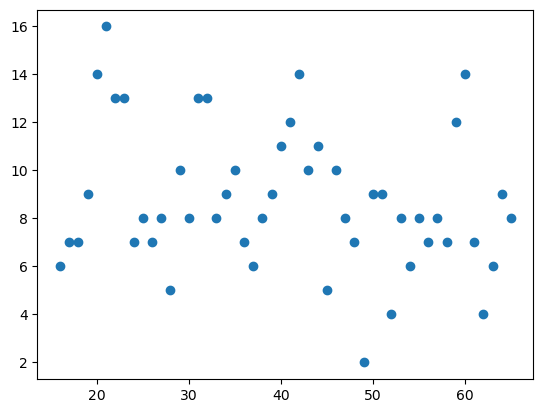

In [12]:
# Scatter plot showin the data distribution between the number of fatalities per age group. 
plt.scatter(age_df["Age"],age_df["Accident_count"])
plt.show()